# Import Important Libraries

In [17]:
from keras.datasets import fashion_mnist
from tensorflow.keras import layers
from tensorflow import keras
import kerastuner
from kerastuner.tuners import RandomSearch
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Load the dataset - fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Normalize pixel values to be between 0 & 1

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model

In [7]:
def build_model(hp):
    model = keras.Sequential()

    # Flatten the input layer
    model.add(layers.Flatten(input_shape=(28, 28)))

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    
    # Tune the number of Dense layers
    hp_layers = hp.Int('layers', min_value=1, max_value=3, step=1)
    for _ in range(hp_layers):
        model.add(layers.Dense(units=hp_units, activation='relu'))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Initiate the tuner

In [9]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    executions_per_trial=3,  # Number of models to train per trial
    directory='my_tuner_dir',  # Directory to save the tuning results
    project_name='fashion_mnist_tuning'
)

# Perform the hyperparameter search

In [10]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 02m 40s]
val_accuracy: 0.8706666827201843

Best val_accuracy So Far: 0.878766655921936
Total elapsed time: 00h 17m 43s


# Get the best hyperparameters

In [11]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters

In [12]:
model = tuner.hypermodel.build(best_hps)

# Train the final model

In [13]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4726 - accuracy: 0.8277 - val_loss: 0.3981 - val_accuracy: 0.8555
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3558 - accuracy: 0.8698 - val_loss: 0.3923 - val_accuracy: 0.8536
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3211 - accuracy: 0.8809 - val_loss: 0.3758 - val_accuracy: 0.8660
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2978 - accuracy: 0.8890 - val_loss: 0.3624 - val_accuracy: 0.8684
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2788 - accuracy: 0.8957 - val_loss: 0.3342 - val_accuracy: 0.8816
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2643 - accuracy: 0.8999 - val_loss: 0.3296 - val_accuracy: 0.8828
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2503 - accuracy: 0.9044 - val_loss: 0.3831 - val_accuracy:

# Evaluate the model

In [15]:
_,train_acc=model.evaluate(x_train,y_train,verbose=1)
_,test_acc=model.evaluate(x_test,y_test,verbose=1)
print('Train Accuracy:\t',train_acc)
print()
print('Test Accuracy:\t',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8814
Train Accuracy:	 0.9188833236694336

Test Accuracy:	 0.8813999891281128


# Plot the results

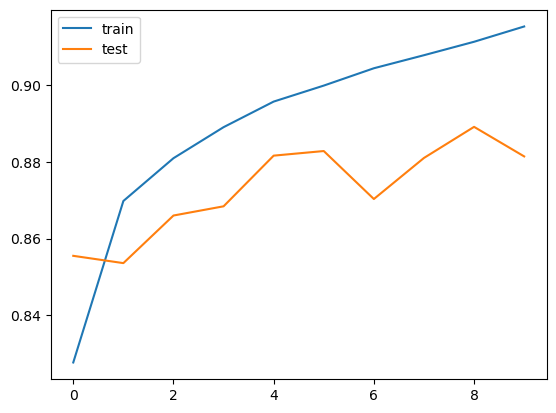

In [18]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()
